In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import collections
import corner

plt.rcParams['axes.formatter.useoffset'] = False

In [2]:
# This is the name of the folder where emcee and emcee_plot are stored, 
# it's the same of the configuration file but without the .yaml extension
#dir_mods = '/home/ubuntu/Desktop/lab2/WASP-44/WASP-44-b/TASTE_analysis/WASP44_TASTE/'
dir_mods = '/home/adri/Desktop/Astrolab2/Ziggy/WASP-44-b/TASTE_analysis/WASP44_TASTE/'


# This name will be used to store all your 
filename = 'WASP44_TASTE_cornerplot'


planet_list = ['b']


In [3]:
# Kipping transformation for quadratic limb darkening coefficients
def get_2var_c1(q1, q2):
    return 2.0*np.sqrt(q1) * q2

def get_2var_c2(q1, q2):
    return np.sqrt(q1) * (1.0 - 2.0*q2)

In [6]:
# Dictionary keyword is the filename in emcee_plot/planet_samples/
#Change the labels as you prefer
planet_dictionary = {
    'b_P.dat': 'P [d]',
    'b_Tc.dat': 'Tc',
    'b_b.dat': 'b',
    'b_R_Rj.dat': 'R [R_j]',
}

# check if the reported filename is the same as in your case,
# the initial number may change from run to run

q1_samples = np.genfromtxt(dir_mods + 'emcee_plot/all_samples/' + '4_limb_darkening_ld_q1.dat')
q2_samples = np.genfromtxt(dir_mods + 'emcee_plot/all_samples/' + '5_limb_darkening_ld_q2.dat')
rho_samples = np.genfromtxt(dir_mods + 'emcee_plot/all_samples/' + '6_star_parameters_rho.dat')
logln_samples = np.genfromtxt(dir_mods + 'emcee_plot/all_samples/' + 'log_likelihood.dat')
j_samples = np.genfromtxt(dir_mods + 'emcee_plot/all_samples/' + '10_LCdata_jitter_0.dat')
n_box = len(planet_dictionary) + 5
n_samples = len(q1_samples)

samples = np.empty([n_samples, n_box])
labels = []
i_index = 0

for i_index, key_name in enumerate(planet_dictionary):
    samples[:, i_index] = np.genfromtxt(dir_mods + 'emcee_plot/planet_samples/' + key_name)
    labels.append(planet_dictionary[key_name])

samples[:, i_index+1] = get_2var_c1(q1_samples, q2_samples)
labels.append('LD c1')
samples[:, i_index+2] = get_2var_c2(q1_samples, q2_samples)
labels.append('LD c2')
samples[:, i_index+3] = rho_samples
labels.append(r"$\rho$") # use a better label for the density in solar units

samples[:, i_index+4] = logln_samples
labels.append('log-likelihood ') # use a better label for the density in solar units

samples[:, i_index+5] = j_samples
labels.append('jitter ')

print(labels)

median = np.median(samples, axis=0)


['P [d]', 'Tc', 'b', 'R [R_j]', 'LD c1', 'LD c2', '$\\rho$', 'log-likelihood ', 'jitter ']


<IPython.core.display.Javascript object>


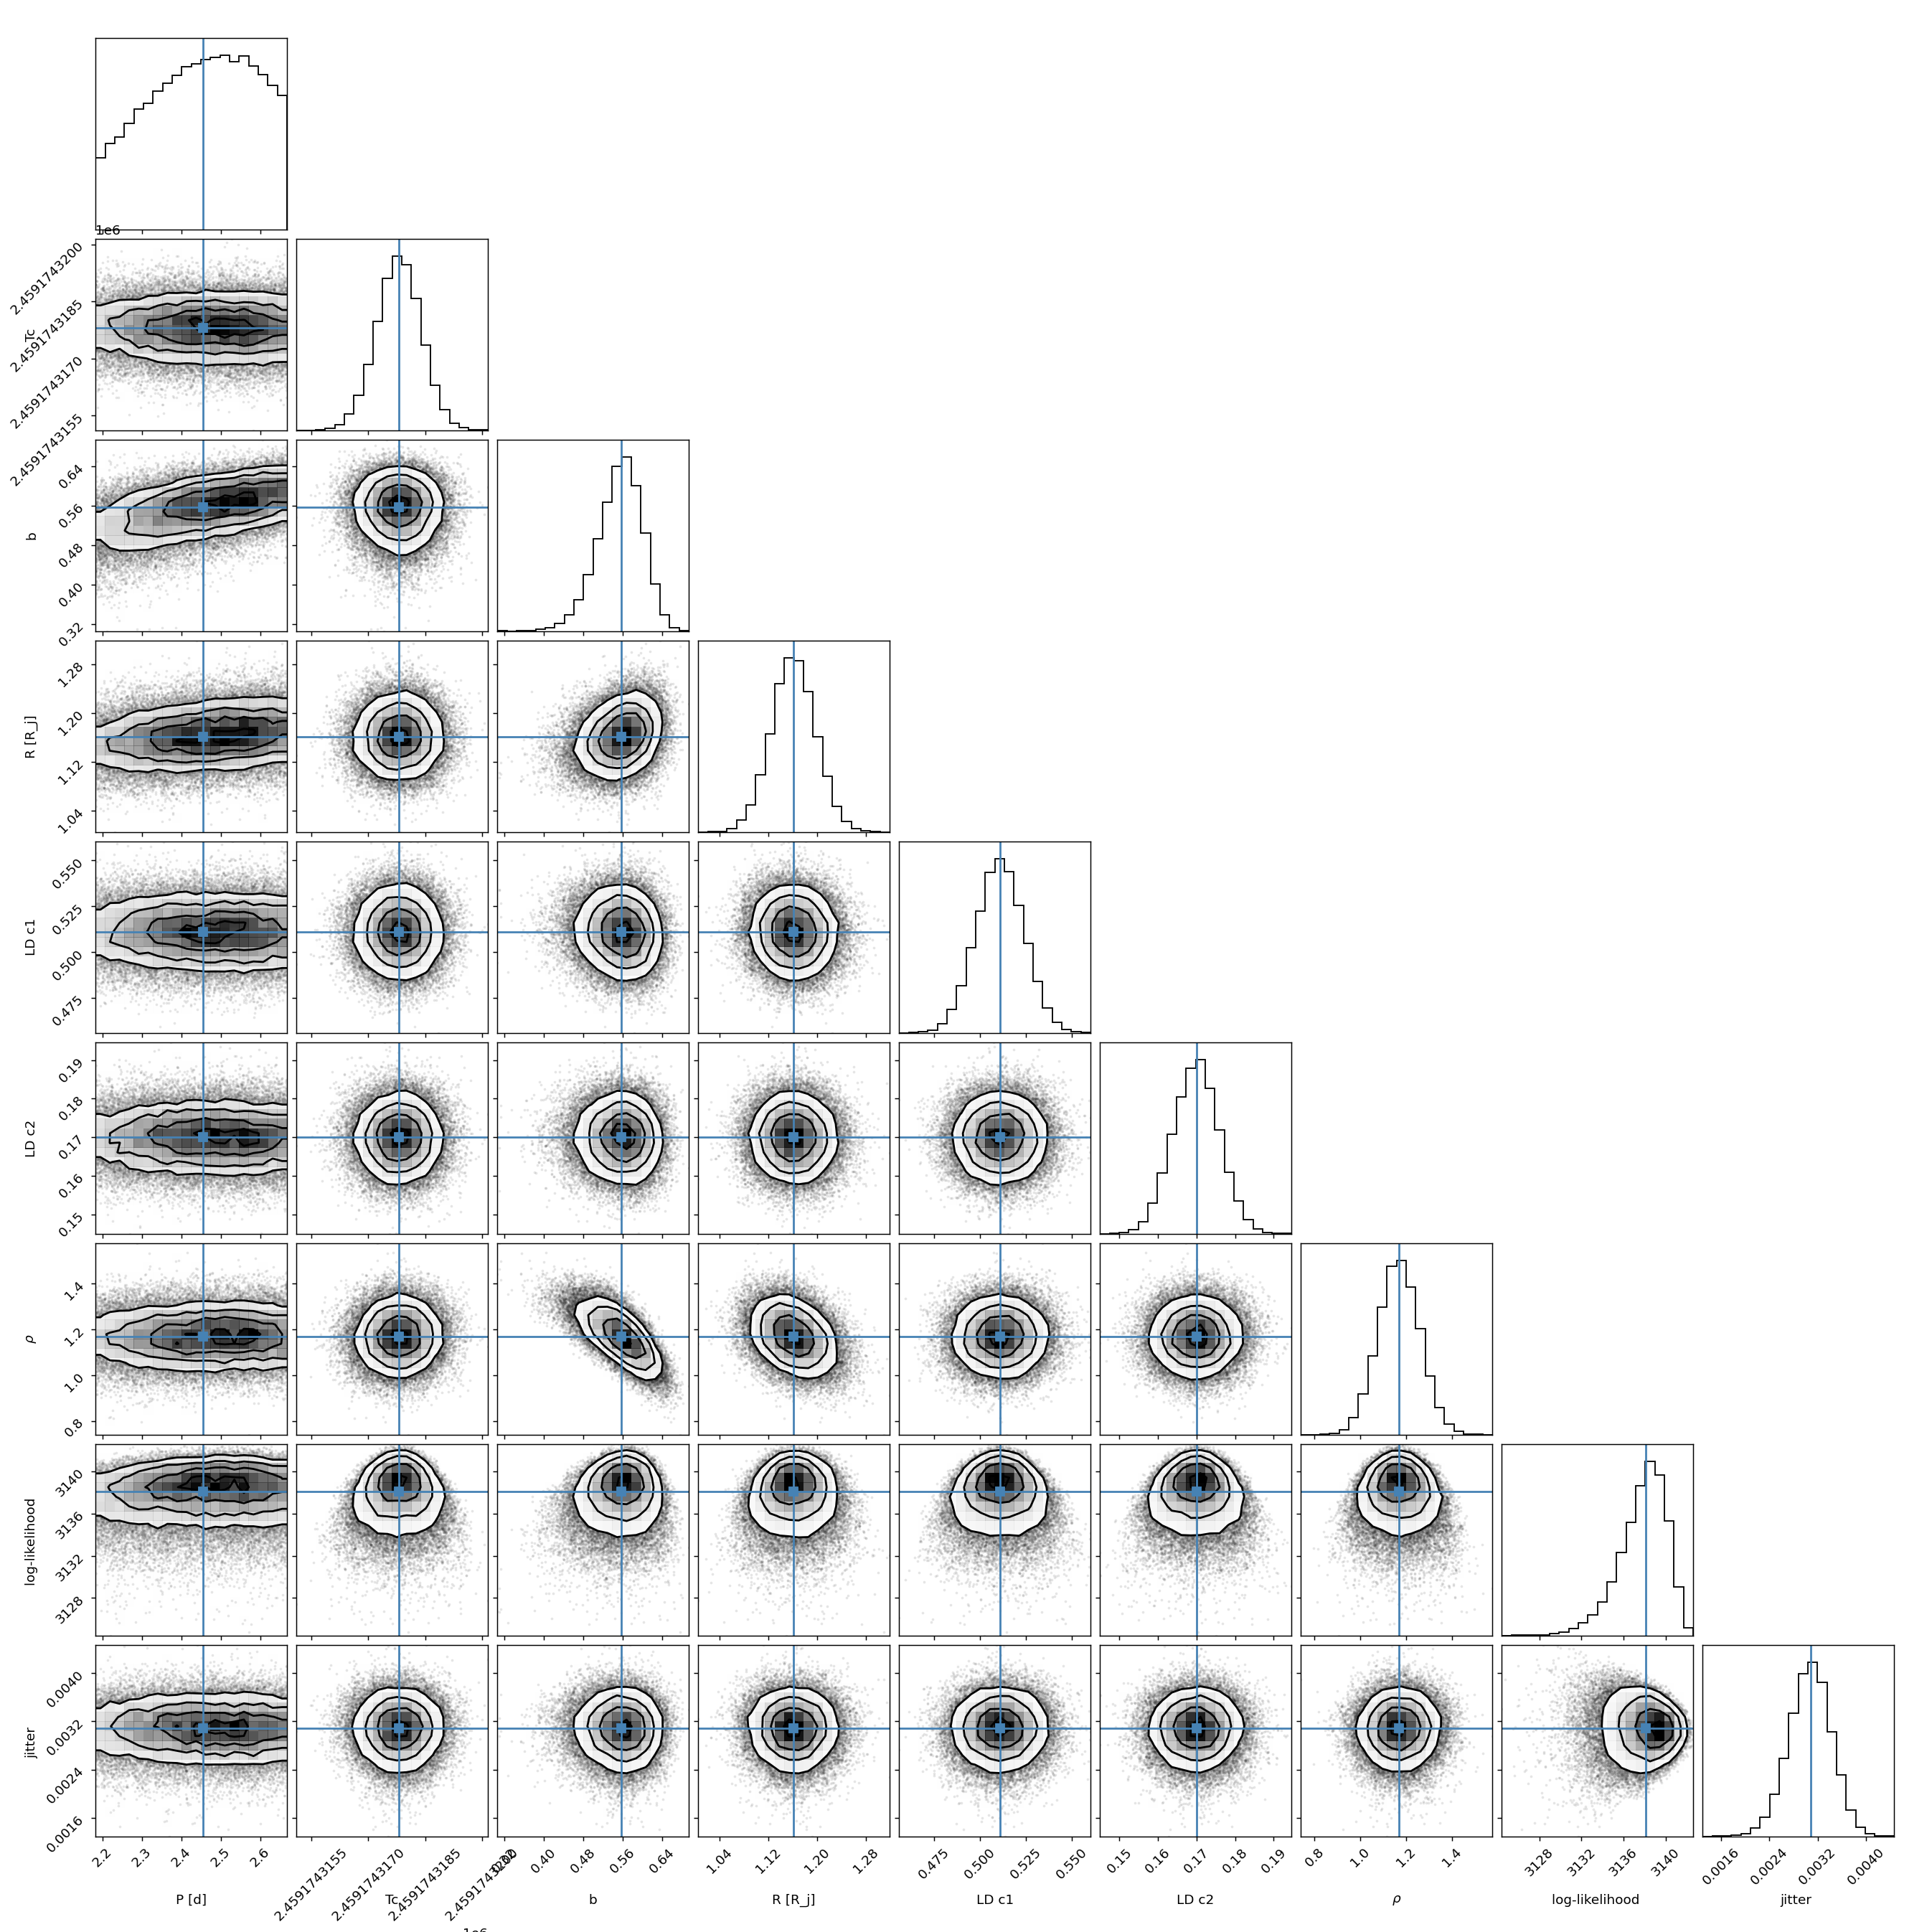

In [7]:
figure = corner.corner(samples, labels=labels, truths=median,
                       show_titles=False, title_kwargs={"fontsize": 12})
figure.savefig(filename + '.pdf', bbox_inches='tight', dpi=300)
